# **---------- Unsupervised Learning: ----------**

* In unsupervised learning, you don't know what are you looking for. You are looking for **latent variables.**

  * A latent variable, also known as a hidden variable, is a variable that is not directly observed but is inferred or deduced from other variables that are observed or measured

  *  Unsupervised learning involves the identification of latent variables, which are hidden or unobservable factors that explain the observed data. These latent variables could represent underlying patterns, clusters, or other meaningful structures in the data.



# **--------- Spam Classifier using Bayesian Method ---------**

* We will build it with Bayes theorem.

* Suppose, we want to mark all the emails that have word 'Free' in them as Spam.

* According to this, the forumula of bayes theorem will become:

  $$ P(\text{Spam|Free}) = \frac{P(\text{Free|Spam}) \cdot P(\text{Spam})}{P(\text{Free})} $$

  Here,

  * **P(Spam|Free)** ==> Find the probability of Spam if Word Free is in it
  * **P(Spam)** ==> Total probability that email is spam
  * **P(Free)** ==> Total probability that email is free
  * **P(Free|Spam)** ==> Trained on it already: Probability of obtaining the word Free if the email was Spam (already know that email is spam then we tested and found out that email has word of Free in it).

## **Steps:**

  1. Construct P(Spam | Word) for every word in the text. Then multiply these all probabilities when analyzing new email as the spam.

  2. Must assume all words are independent from each word. Thats why it is called Naive Bayes.

  3. Either the email will be Spam, or it will be Ham (not spam).


* Two things will be used in it:

  1. CountVectorizer:
  2. MultinomialNB





### **1. CountVectorizer:**

* CountVectorizer can be used to convert email text content into a numerical representation, making it suitable for machine learning models.

* The presence or absence of specific "words or phrases" (features) can be indicative of whether an email is spam or not.

* CountVectorizer helps create a feature matrix from emails, which can then be used as input to a classification algorithm.

**>> Text to Bag of Words (BoW) Representation:**

CountVectorizer takes a **corpus of text documents** and transforms them into a **matrix of token counts.**

---- Each ROW of the matrix corresponds to a DOCUMENT,

--- and each COLUMN corresponds to a unique WORD (token)

-- in the entire corpus.

### **2. MultinomialNB:**

**>> Purpose:**

* MultinomialNB is a **classification algorithm** based on the **Naive Bayes theorem**, and its purpose in email spam detection **is to classify emails** into two categories: spam and non-spam (ham).

**>> Probabilistic Classification:**

* MultinomialNB uses the probabilities of word occurrences in spam and non-spam emails to make predictions i.e. P(Spam | Word)

* It calculates the conditional probabilities of observing each word in a given class (spam or non-spam) and uses Bayes' theorem to estimate the posterior probability of an email belonging to a particular class. This means that, given the evidence (the words in the email), we calculate the probability that the email is spam or non-spam.

* MultinomialNB is used to build a probabilistic model based on the frequency of words (features) in spam and non-spam training emails.

**>> Steps:**
* When a new email is received, the model calculates the probability that it belongs to the spam class and the probability that it belongs to the non-spam class.

* The class with the higher probability determines the classification of the email (spam or non-spam).

* MultinomialNB is popular for this task because it works well with text data represented using techniques like CountVectorizer, making it suitable for the discrete nature of word counts.

In [ ]:
# ------- Training ---------

data = pd.DataFrame(('message': [], 'class': []))

data = data.append(dataFromDirectory('.../emails/spam', 'spam'))
data = data.append(dataFromDirectory('.../emails/ham', 'ham'))

vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
target = data['class'].values

classifier.fit(counts, targets)

In [ ]:
# -------- Prediction -----------

test_example = "Free Vigana now!!!"

counts = vectorizer.transform(test_example)

prediction = classifier.predict(counts)

# **--------- K-Means Clustering: -----------**

* The random choice of initial points (called centroids) to start, can yield to different results

* Run it a few times and calculate error,,,, just to make sure your initial choice of points is not wacky



# **-------- Entropy: ----------**

* It measures the disorderness/impurity of our dataset.

* It measures how much smilir OR different is our data.

* Suppose we have **n** different classes,

  * Entropy = 0 if the data has all same classes (all data is just about one class)

  * Entropy is high if all the classes are different

Or we can say:

  * If all data points belong to a single class, the dataset is perfectly ordered, and the entropy is 0.

  * If the data is evenly distributed among all classes (each class has an equal proportion), the dataset is the most disordered, and the entropy is 1.

## **>> Formula:**

H(S) = - $p_1$ ln $p_1$ - $p_2$ ln $p_2$ .... - $p_n$ ln $p_n$

$p_i$ shows the proportion of the dataset that have that class.



## **>> Example:**

Suppose I have dataset. In that there are 3 classes. 20% data belongs to one class, 40% belongs to other class and 40% belongs to third class. Now tell me about entropy?

**Solution:**

To calculate the entropy, you would use the proportions (percentages) of each class:

•	p1=0.20 for the first class.

•	p2=0.40 for the second class.

•	p3=0.40 for the third class.

Now, plug these values into the entropy formula:

Entropy=−(0.20⋅log_2(0.20)+0.40⋅ log_2 (0.40)+0.40⋅log_2(0.40))Entropy=−(0.20⋅log2(0.20)+0.40⋅log2(0.40)+0.40⋅log2(0.40))

The entropy quantifies how mixed or impure the dataset is in terms of class distribution. The result will be between 0 and 1, where 0 indicates perfect purity (all data in one class), and 1 indicates maximum impurity (data evenly spread across all classes).

# **-------------- Decision Tree and Random Forest: ---------------**

* At each step, find the attributes that we can use to partition to minimize the entropy of the dataset at each step

* It is greedy algorithm, as it goes down the tree, it just picks the decision that reduce the entropy THE MOST at each stage.

* It might not actually result in an optimal result but it works.

* Decision tree can easily overfit because they remember the best nodes at training data to make best tree by becoming greedy at that moment, but on testing time, they do blunder.

* Solution is random forest. It does everything on random, picks features on random. So, there is no risk of memorizing or behaving greedy.


# **------------ Ensemble Learning -----------**

* In ensemble learning, we use multiple models to solve the same problem, and let them vote on the result.

* Random forest uses Bagging (Bootstap aggregating) to implement ensemble learning.

## **Methods of Ensembling:**

* **1. Bagging:** Take random samples from training data, and feed them into different versions of the same model and let them all vote on the final result.

* **2. Boosting:** In it, each subsequent model BOOST the attributes that address the misclassified by the previous model

 OR

  * Run a model, figure out its week points, amplify your focus on those weak points as you go, and keep building more and more models that keep refining that model based on the weakness of the previous model.

* **3. Bucket of models:** A bucket of different models (e.g. KNN, regression, K-means etc.) trains different models using training data and picks the one that works best with the test data.

  * it means I can run these all models together on training data and let them all vote on the final classification result. Its better to use it, instead of using them all in isolation.

* **4. Stacking (Stacked Generalizatio):** Stacking runs multiple models at once on the data, and combines the result together.

  OR

  * Stacking introduces a higher-level model called the meta-model or blender.  

  **Example:**

  Stacking is like getting advice from several experts. Imagine you want to predict the weather. You ask three friends who are pretty good at it, but they use different methods.

* Friend A checks the clouds.
* Friend B looks at the wind.
* Friend C watches the temperature.

You then have a super-smart friend, the "meta-friend." This friend learns from your three friends' predictions and figures out whose advice to trust more in different situations. So, if it's cloudy, they might listen more to Friend A.

In the end, the meta-friend gives you the best weather prediction based on what your three friends said.

Stacking combines the ideas of your friends (base models) to make a more accurate prediction (the meta-model).

## **Advance Ensemble learning Methods - Ways to sound smart:**

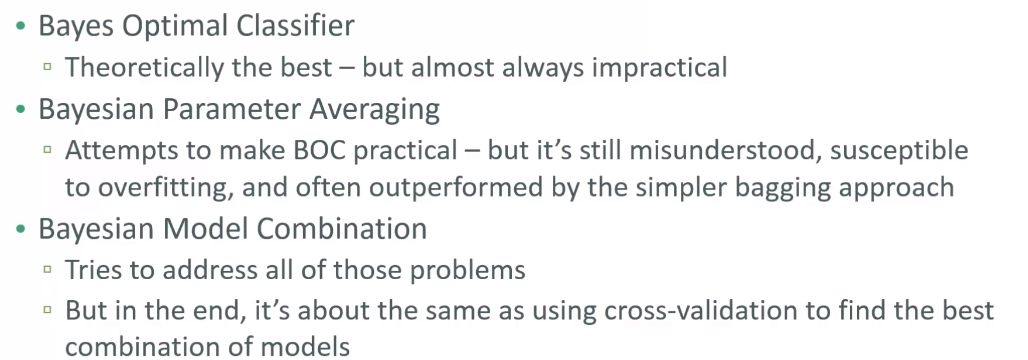



# **XGBOOST - Xtreme Gradient Boosting Trees:**

* Almost most powerful ML algorithm today.

* In it, each tree BOOSTS attributes that led to the misclassification in previous tree

* Its very easy to use and computationally efficient and fast

* Its best choice for both classification and regression.

## **>> Features of XGBOOST:**

1. It uses regularized boosting (L1 and L2) so it make sures model is generalized and not overfitted
2. It can handle missing values automatically
3. It can run in parallel in your cpu and do parallel processing
4. It can cross validate at each iteration
  * It finds optimal number of iterations and enables early stopping **(Early stopping involves monitoring a model's performance on a validation dataset and stopping the training process when the performance starts to degrade, rather than allowing the model to continue training until it perfectly fits the training data. Early stopping helps prevent models from becoming too complex and overfitting the training data, which can lead to poor generalization to new data. It strikes a balance between training long enough to learn patterns but not so long that it starts memorizing noise in the training data.)**

5. It does Incremental training. (i.e. you can stop training and save it, and then come back and start from there again. Also, you can do training in small batches).

6. You can plugin your optimization objectives in it. You can tell what are your goals and can make XGBOOST to work on that.

7. It does trees pruning and generally result in deeper but optimized trees.

## **>> How to use it??**

1. Pip install xgboost

2. You can't use it only in scikit-learn but also with JAVA, C++, Julia etc.

3. It saves the features and labels in a data structure named DMatrix. This matrix can be created easily though numpy arrays. All parameters are passed via dictionary.

4. Simply call train function then predict function and you are done.

## **>> XGBOOST Hyperparameters:**

Hard part is to choose best hyperparameters of xgboost.

1. **Booster:** Choose **gbtree** for classification problem and **gblinear** for regression problem

2. Objective: (i.e. multi:softmax, multi:softprob)

The choice of the "Objective" parameter determines the type of problem you're trying to solve and the loss function that the algorithm will use during training.

The key difference is in the type of output they produce: "multi:softmax" provides class labels as output, while "multi:softprob" provides probabilities for each class. Your choice depends on whether you need the class labels or just the class probabilities for your specific application or downstream tasks.

3. **Eta:** It is leaning rate. It adjusts weight on each step.

"Eta" (often denoted as η) stands for the "Learning Rate." Default value is 0.3... so 0.2 or lower can produce better results.

4. **Max_depth:** Maximum depth of the tree

5. **Min_child_weight:** It control overfitting, but making it too high can cause underfitting

and many more other parameters too...

## **>> EXAMPLE:**










In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

# Number of rows = num_samples, Number of columns = num_features
num_samples, num_features = iris.data.shape

print(num_samples)
print(num_features)

print(list(iris.target_names))


150
4
['setosa', 'versicolor', 'virginica']


In [4]:
from sklearn.model_selection import train_test_split

# random state ensures that when you run the same code with the same data multiple times, you get the same results.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.2, random_state = 0)

In [7]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3
}

epochs = 10

model = xgb.train(param, train, epochs)

In [9]:
predictions = model.predict(test)

In [10]:
predictions

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.], dtype=float32)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

1.0

# **--------- Support Vector Machine: -------------**



* It works well for classifying high dimensional data (means data with a lot of features)

* Find higher dimensional support vectors to divide the data

* Use kernel trick to represent the data in high dimension space to find hyperplanes that are apparent to find in low dimension

* It is fairly expensive - the 'kernel trick' is the only thing that makes it possible

* In practice, We use SVC to classify data using SVM

* We can use different kernels with SVC. Some will work better than others for different datasets

